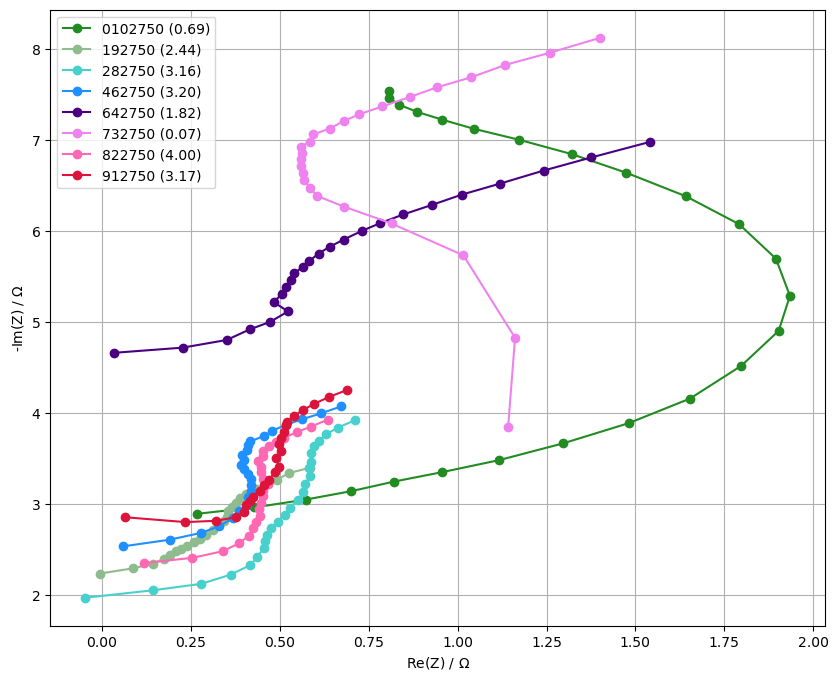

In [53]:
#Re-plotting EIS curves in python:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/EIS'  

file_list = [filename for filename in os.listdir(directory) if filename.endswith('.txt')]

plt.figure(figsize=(10, 8))

def extract_six_number_code(filename):
    match = re.search(r'\d+', filename)
    if match:
        return match.group()
    else:
        return None

sorted_file_list = sorted(file_list, key=extract_six_number_code) 

color_mapping = {
    '0102750': 'forestgreen',
    '192750': 'darkseagreen',
    '282750': 'mediumturquoise',
    '372750': 'skyblue',
    '462750': 'dodgerblue',
    '642750': 'indigo',
    '732750': 'violet',
    '822750': 'hotpink',
    '912750': 'crimson'
}

slopes = []

for filename in sorted_file_list:
    six_number_code = extract_six_number_code(filename)
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path, delimiter='\t')

    ImZ = df['-Im(Z)/Ohm'][5:30]
    ReZ = df['Re(Z)/Ohm'][5:30]

    plt.plot(ImZ, ReZ, marker='o', linestyle='-', label=six_number_code, color=color_mapping.get(six_number_code, 'black'))

    if len(recip_sqrt_freq) > 1:
        slope, _ = np.polyfit(ImZ, ReZ, 1)
        slopes.append(slope) 

plt.xlabel('Re(Z) / $\Omega$')
plt.ylabel('-Im(Z) / $\Omega$')
plt.grid(True)

legend_labels = [f"{extract_six_number_code(label)} ({slope:.2f})" for label, slope in zip(sorted_file_list, slopes)]
plt.legend(legend_labels)  

plt.show()
